# PCA (Principal Component Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


## Deskripsi Data

In [3]:
#ukuran data
data.shape

(48204, 9)

In [4]:
#melihat tipe data untuk tiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
#mengubah tipe data menjadi tipe data waktu
data['date_time'] = pd.to_datetime(data['date_time'])

In [6]:
#melihat statistika deskriptif untuk tiap kolom numerik
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [7]:
data.describe(include='object')

,holiday,weather_main,weather_description
count,48204,48204,48204
unique,12,11,38
top,None,Clouds,sky is clear
freq,48143,15164,11665


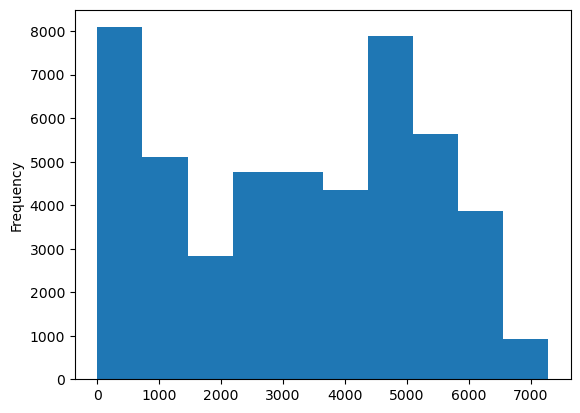

In [8]:
data['traffic_volume'].plot.hist()
plt.show()

dari data diatas:
* Dari 2012-10-02 09:00:00 ke 2018-09-30 23:00:00, jumlah kendaraan yang melintas bervariasi dengan rangen 0 hingga 7280. 
* Di beberapa hari, tidak terjadi kemacetan sama sekali atau dalam data adalah 0 
* 25% dari keseluruhan waktu, terdapat 4933 atau lebih jumlah kendaraan; secara kontras, terdapat 25% juga dari keseluruhan waktu, terdapat 1193 atau kurang jumlah kendaraan 
* Ketika jumlah kendaraan sampai 4933 atau lebih, maka ini merupakan puncak kemacetan dalam sehari yang bisa disebabkan oleh banyaknya mobilitas untuk bekerja dan sebagainya. t
* ketika jumlah kendaraan hanya 1193 atau kurang, maka kemungkinan terjadi ketika hari mendekati malam.

### segregating the data into two parts: nighttime and daytime

In [9]:
#mengubah tipe data menjadi tipe data waktu
data['date_time'] = pd.to_datetime(data['date_time'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


divide equally between 12 hours:
* 7am - 7pm
* 7pm to 7am

In [11]:
data['date_time'].dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7], dtype=int64)

In [12]:
daytime_data = data.copy()[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour < 19)]

In [13]:
nighttime_data = data.copy()[(data['date_time'].dt.hour >= 19) | (data['date_time'].dt.hour < 7)]
#if either are true

In [14]:
daytime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [15]:
nighttime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


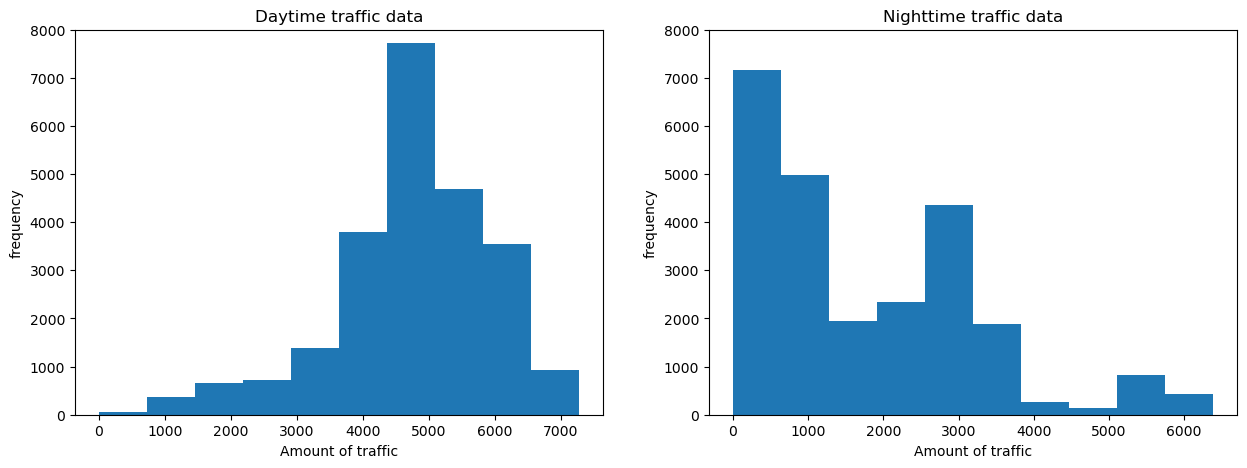

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Daytime traffic data')
plt.xlabel('Amount of traffic')
plt.ylabel('frequency')
plt.ylim([0, 8000])

plt.subplot(1, 2, 2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Nighttime traffic data')
plt.xlabel('Amount of traffic')
plt.ylabel('frequency')
plt.ylim([0, 8000])

plt.show()

observasi:
* kemacetan bertambah ketika di siang hari karena memiliki rata - rata jumlah kendaraan lebih tinggi dibanding ketika sudah malam.
* 75% dari keseluruhan waktu, kemacetan timbil ketika jumlah kendaraan mencapai 4252.
* Kemacetan di siang hari lebih condong ke kanan sehingga disimpulkan bahwa sebagian besar jumlah kendaraan lebih banyak. 
* Kemacetan di malam hari lebih condong ke kiri sehingga disimpulkan sebagian besar jumlah kendaraan lebih sedikit. 

### Visualising data changes based on time parameters


Visualising data changes based on time parameters
* month
* day of the week
* time of day
</br> As peak movement may be influenced by these behaviours, e.g. I expect higher traffic numbers when people commute to and from work, more traffic during summer months. Potentially higher during weekday around the above times, too.

In [17]:
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month_day = daytime_data.groupby('month').mean()
by_month_day['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [18]:
daytime_data['year'] = daytime_data['date_time'].dt.year
by_year_day = daytime_data.groupby('year').mean()
by_year_day['traffic_volume']

year
2012    4675.346861
2013    4834.084298
2014    4765.309296
2015    4748.448485
2016    4637.518293
2017    4865.961752
2018    4726.280534
Name: traffic_volume, dtype: float64

In [19]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
by_hour_day = daytime_data.groupby('hour').mean()
by_hour_day['traffic_volume']

hour
7     4740.181337
8     4587.497115
9     4385.277502
10    4184.665544
11    4465.877561
12    4718.293095
13    4714.940682
14    4931.888776
15    5240.524302
16    5663.756539
17    5310.076048
18    4263.718530
Name: traffic_volume, dtype: float64

In [20]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<Figure size 640x480 with 0 Axes>

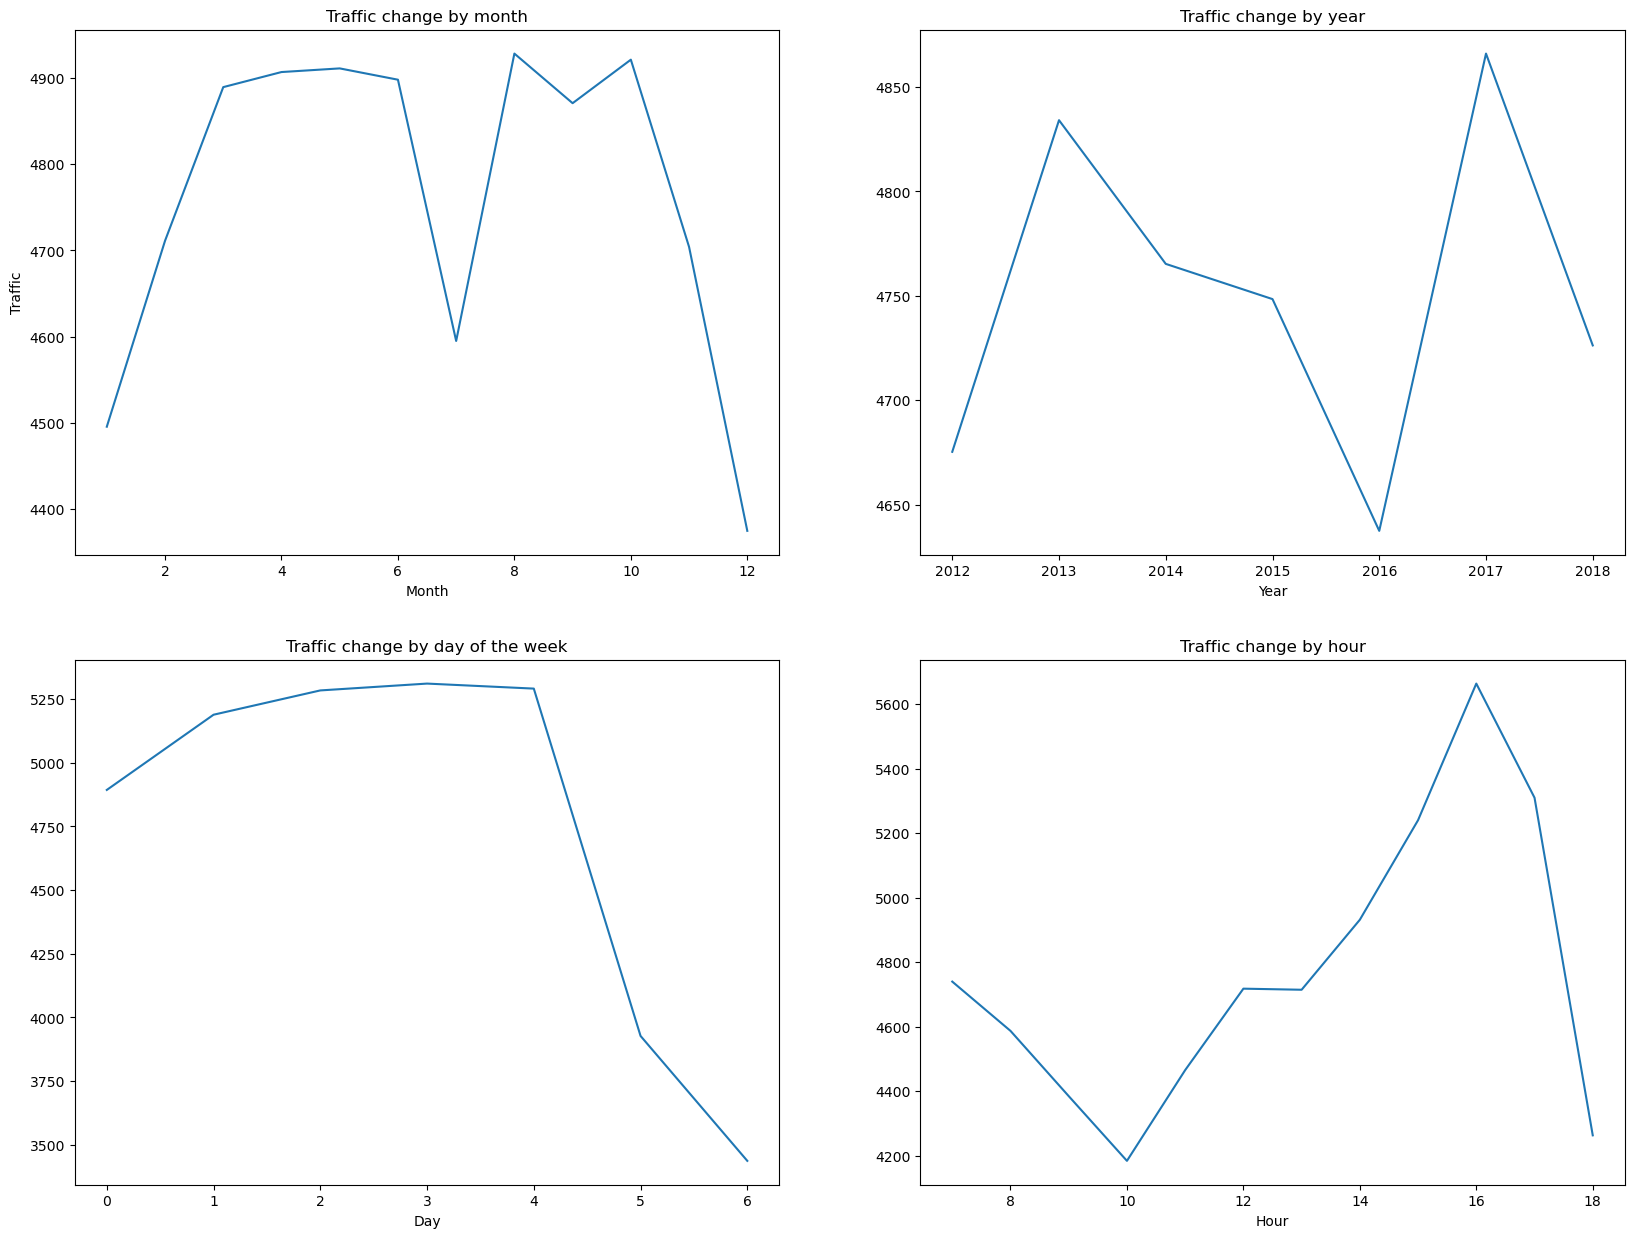

In [21]:
plt.figure()
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(by_month_day['traffic_volume'])
plt.title("Traffic change by month")
plt.xlabel("Month")
plt.ylabel("Traffic")


plt.subplot(2, 2, 2)
plt.plot(by_year_day['traffic_volume'])
plt.title("Traffic change by year")
plt.xlabel("Year")

plt.subplot(2, 2, 3)
plt.plot(by_dayofweek['traffic_volume'])
plt.title("Traffic change by day of the week")
plt.xlabel("Day")

plt.subplot(2, 2, 4)
plt.plot(by_hour_day['traffic_volume'])
plt.title("Traffic change by hour")
plt.xlabel("Hour")

plt.show()

Observations

by month:
* kemacetan berkurang ketika cuaca lebih dingin karena terlihat pada bulan musim salju, tingkat kemacetan berkurang. 

by year:
* Terdapat penurunan tingkat kemacetan di tahun 2016 yang cukup signifikan namun, itu tak berlangsung lama karena pada tahun 2017, terdapat kenaikan signifikan sehingga memiliki tingkat kemacetan tertinggi.

by day:
* Pada hari kerja (Senin - Jumat), menjadi hari tersibuk yang terbukti dari tingkat kemacetannya selalu tinggi dan akan mengalami pengurangan di hari Sabtu dan Minggu. 

by hour:
* Pada jam 10 pagi dan jam 6 malam, jumlah kendaraan lebih sedikit
* Tingkat kemacetan tinggi terjadi pada jam 4 sore hingga jam 5 sore. 
* Tingakt kemacetan mengalami kenaikan yang stabil diantara jam 2 siang hingga jam 4 sore. 

### Splitting dataset by weekday - working week and weekend¶


In [22]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday, due to indexing starting at 0
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(1500.0, 6250.0)

<Figure size 640x480 with 0 Axes>

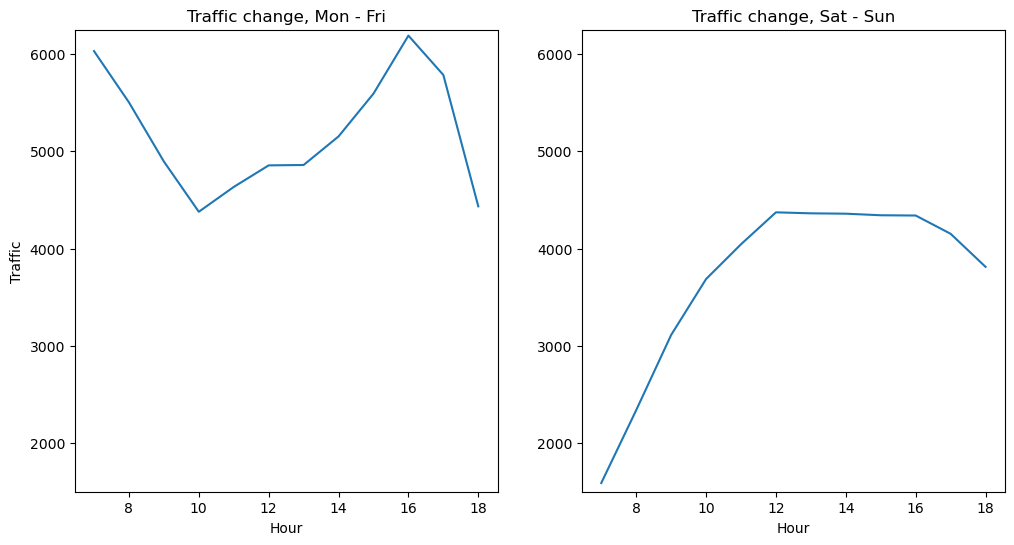

In [23]:
plt.figure()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title("Traffic change, Mon - Fri")
plt.xlabel("Hour")
plt.ylim([1500, 6250])
plt.ylabel("Traffic")

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title("Traffic change, Sat - Sun")
plt.xlabel("Hour")
plt.ylim([1500, 6250])

Observations:

Mon-Fri
* tingkat kemacetan paling tinggi terjadi jam 7 pagi dan jam 4 sore. Hal ini kemungkinan disebabkan karena biasanya merupakan jam pergi kerja dan jam pulang kerja.
* tingkat kemacetan mengalami penurunan di sekitar jam 10 pagi hingga jam 6 sore. Hal ini kemungkinan disebabkan karena masih banyak orang sedang bekerja atau sudah pulang kerja. 
* tingkat kemacetan paling tinggi dicapai ketika >6000 jumlah kendaraan.

Sat-Sun
* tingkat kemacetan cukup rendah hingga jam 10 pagi dan baru mengalami kenaikan. 
* tingkat kemacetan paling tinggi di jam 12 siang dengan jumlah kendaraan perkiraan adalah 4500 

### Exploring correlations between traffic and weather (categorical values)

In [24]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

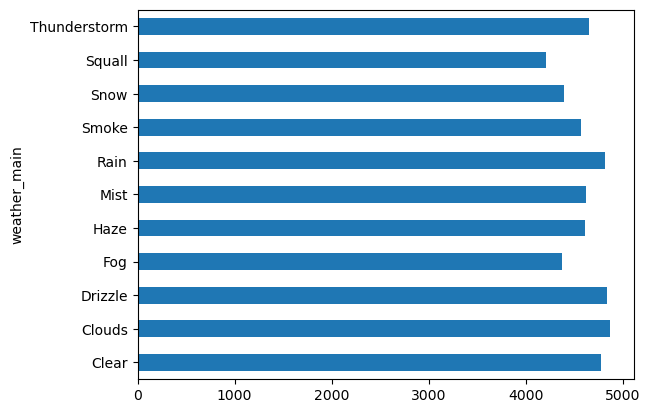

In [25]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

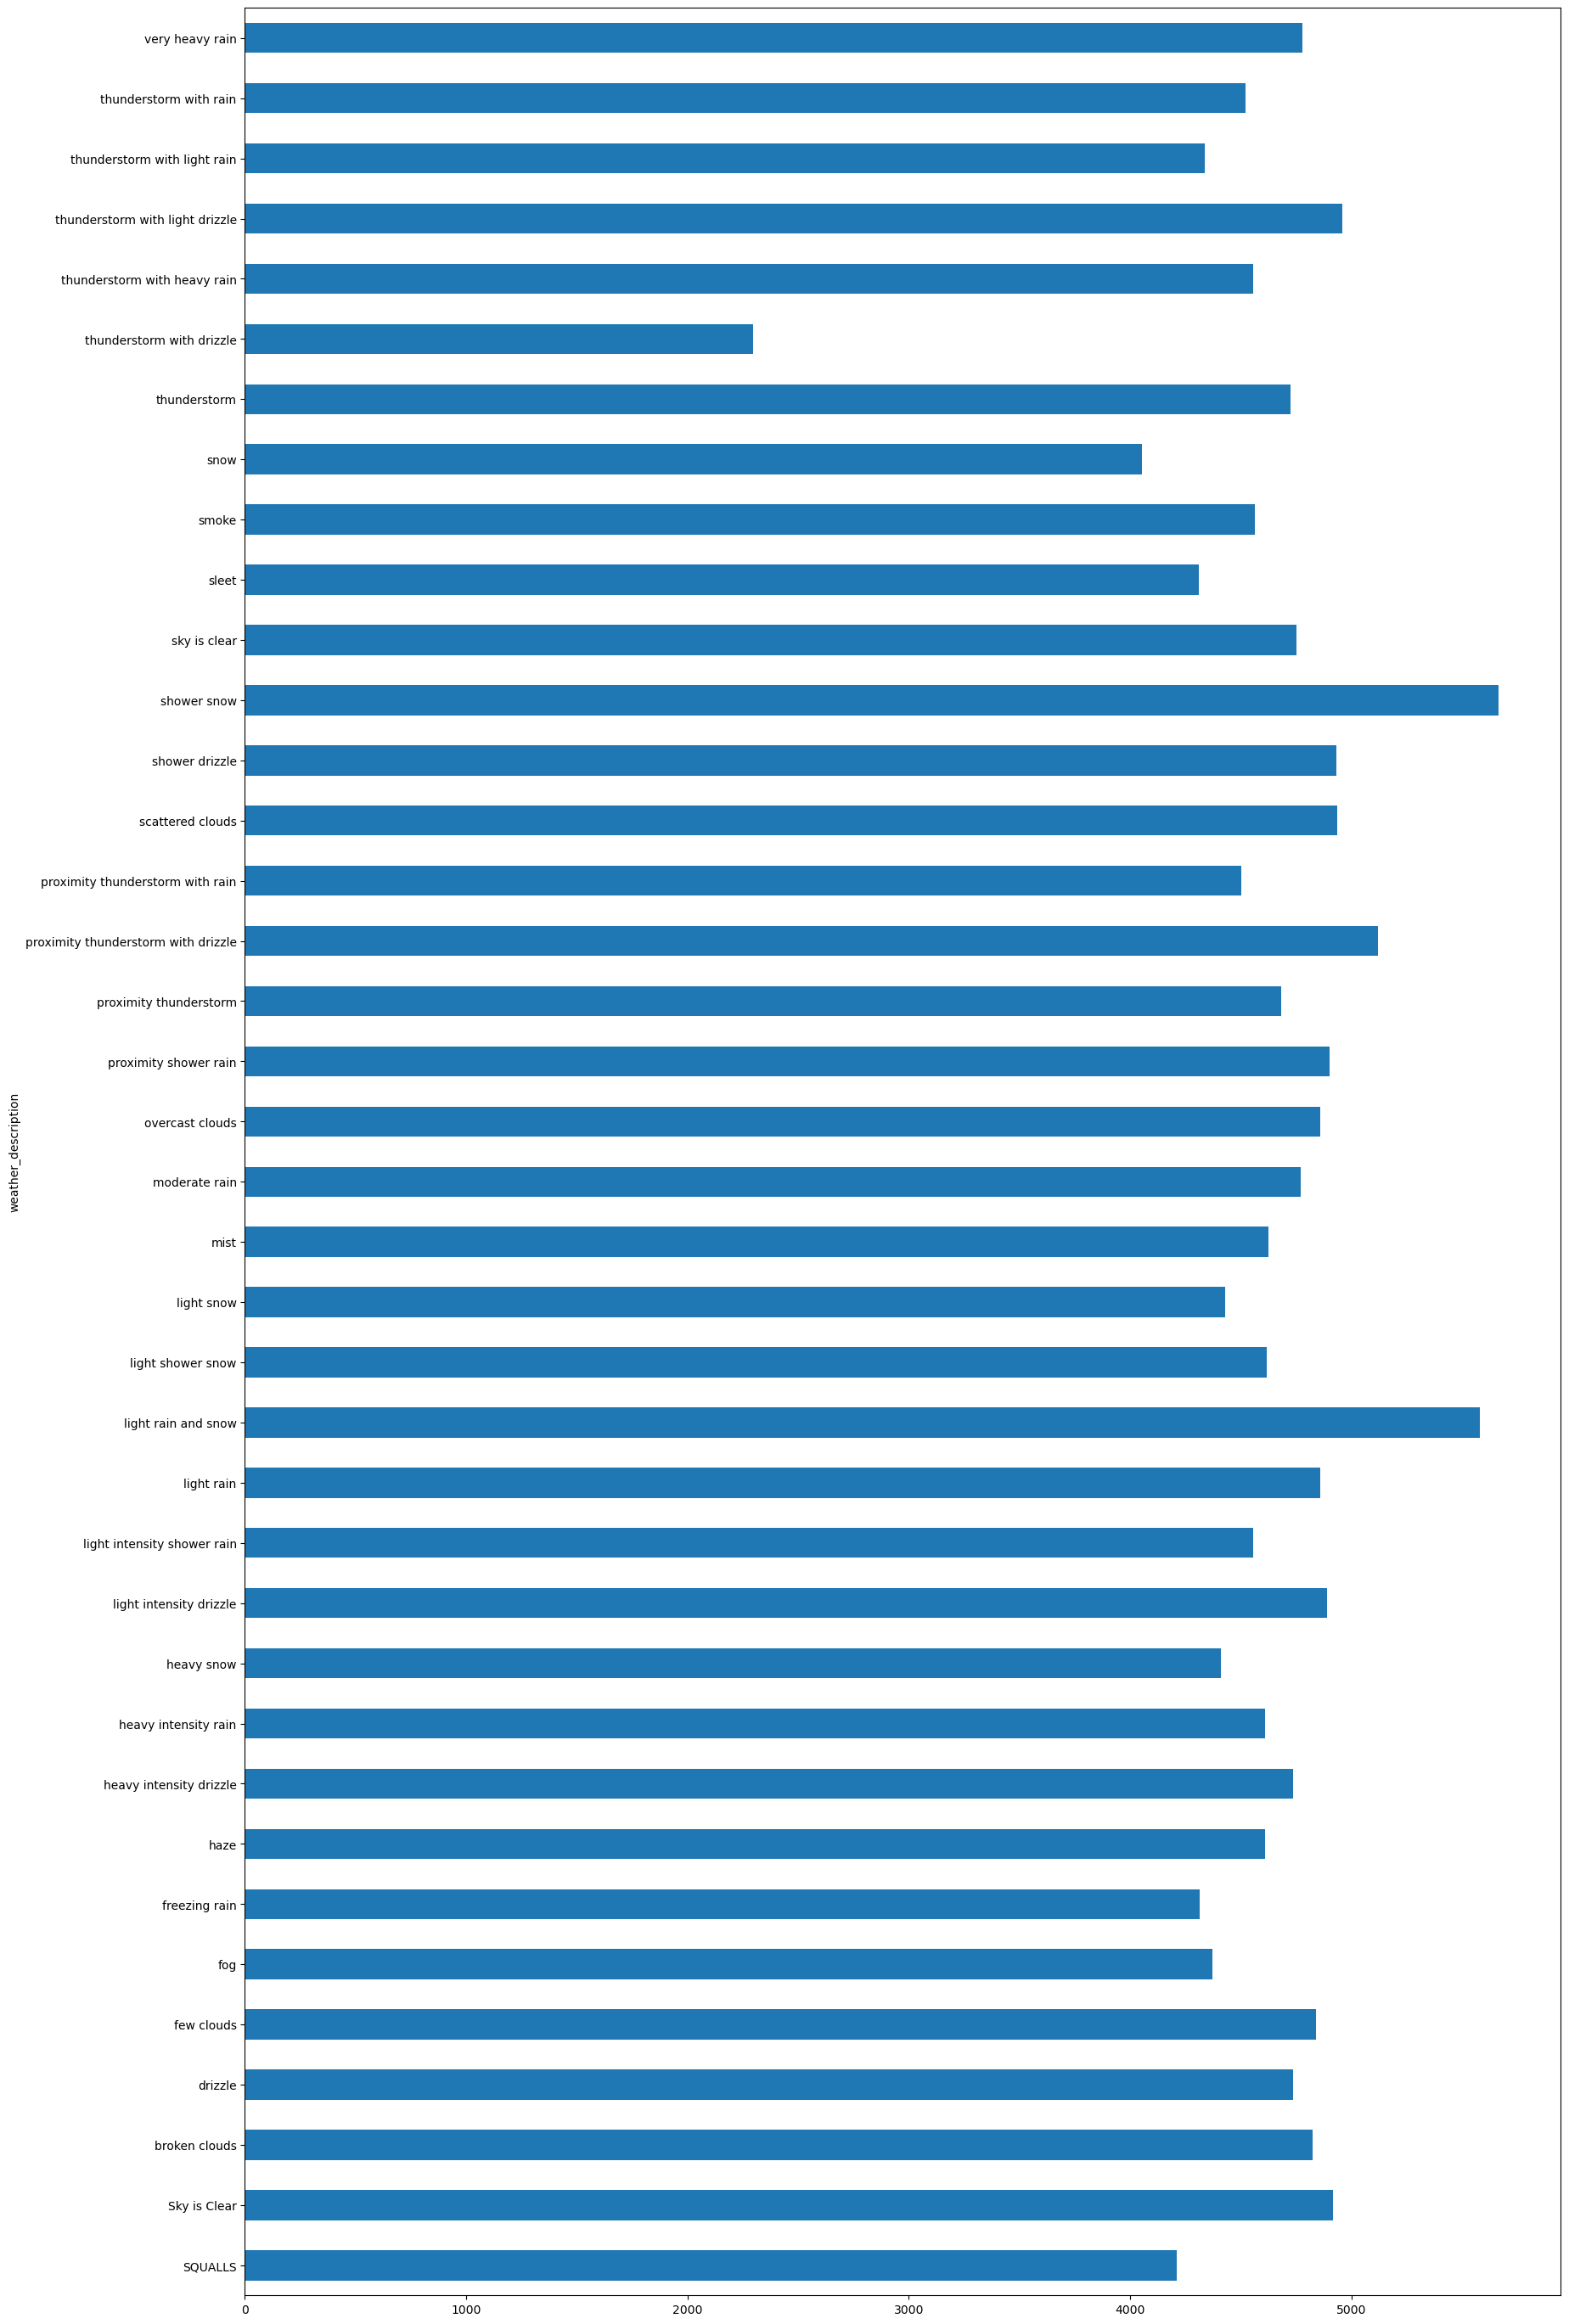

In [26]:
by_weather_description['traffic_volume'].plot.barh(figsize=(20,35))
plt.show()

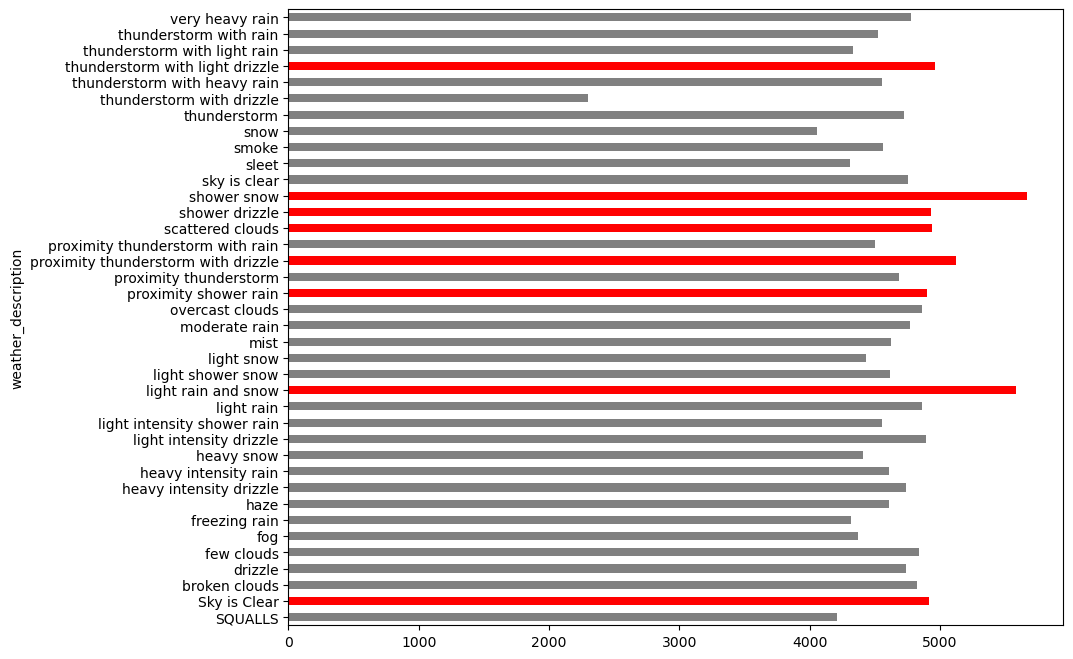

In [27]:
colors = ["red" if i > 4900 else "grey" for i in by_weather_description['traffic_volume']]
by_weather_description['traffic_volume'].plot.barh(figsize=(10,8), color=colors)
plt.show()

Observations:

* Berdasarkan weather description, salju memiliki dampak yang besar terhadap tingkat kemacetan. Hal ini didasari 2 cuaca yang berkaitan dengan salju mengalami kenaikan kemacetan dengan jumlah kendaraan lebih dari 5000. 
* Cuaca badai petir ternyata juga memberikan dampak pada kenaikan kemacetan dengan jumlah kendaraan lebih dari 5000 
* Ketika hari terang, jumlah kendaraan hampir mendekati 5000 juga. 

## Pengujian Asumsi Barlett dan KMO

In [28]:
del data['date_time']

In [29]:
del data['traffic_volume']

In [30]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds
1,None,289.36,0.0,0.0,75,Clouds,broken clouds
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds
4,None,291.14,0.0,0.0,75,Clouds,broken clouds
...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds


In [31]:
# mengambil nilai unik dari setiap kolom
unique_holiday = sorted(data['holiday'].unique())
unique_weather_main = sorted(data['weather_main'].unique())
unique_weather_description = sorted(data['weather_description'].unique())

# membuat kamus untuk mengubah nilai kategori menjadi nilai numerik
holiday_dict = dict(zip(unique_holiday, range(len(unique_holiday))))
weather_main_dict = dict(zip(unique_weather_main, range(len(unique_weather_main))))
weather_description_dict = dict(zip(unique_weather_description, range(len(unique_weather_description))))

# melakukan pengkodean label
df_encoded = data.copy()
df_encoded['holiday'] = df_encoded['holiday'].apply(lambda x: holiday_dict[x])
df_encoded['weather_main'] = df_encoded['weather_main'].apply(lambda x: weather_main_dict[x])
df_encoded['weather_description'] = df_encoded['weather_description'].apply(lambda x: weather_description_dict[x])

# tampilkan hasil encoding
df_encoded

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,7,288.28,0.0,0.0,40,1,24
1,7,289.36,0.0,0.0,75,1,2
2,7,289.58,0.0,0.0,90,1,19
3,7,290.13,0.0,0.0,90,1,19
4,7,291.14,0.0,0.0,75,1,2
...,...,...,...,...,...,...,...
48199,7,283.45,0.0,0.0,75,1,2
48200,7,282.76,0.0,0.0,90,1,19
48201,7,282.73,0.0,0.0,90,10,21
48202,7,282.09,0.0,0.0,90,1,19


In [32]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  int64  
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  int64  
 6   weather_description  48204 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.6 MB


In [33]:
df_encoded['temp']

0        288.28
1        289.36
2        289.58
3        290.13
4        291.14
          ...  
48199    283.45
48200    282.76
48201    282.73
48202    282.09
48203    282.12
Name: temp, Length: 48204, dtype: float64

In [34]:
import numpy as np
from scipy.stats import bartlett
a = df_encoded['holiday']
b = df_encoded['temp']
c = df_encoded['rain_1h']
d = df_encoded['snow_1h']
e = df_encoded['clouds_all']
f = df_encoded['weather_main']
g = df_encoded['weather_description']
stat, p = bartlett(a, b, c, d, e, f, g)
p

0.0

In [35]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [36]:
#CHECK ADEQUACY
#Bartlett
#p-value should be <0.05
chi_square_value,p_value=calculate_bartlett_sphericity(df_encoded)
print('significant value of bartlett test:', p_value)

#KMO
#Value should be >0.5
kmo_all,kmo_model=calculate_kmo(df_encoded)
print("result of KMO test:", kmo_model)

significant value of bartlett test: 0.0
result of KMO test: 0.514604781176736


## Analisis PCA

### Standarisasi Data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardize=df_encoded.copy()
df_standardize=pd.DataFrame(scaler.fit_transform(df_standardize), columns=df_standardize.columns)
df_standardize

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,0.015856,0.530370,-0.007463,-0.027228,-0.239963,-0.566905,0.831600
1,0.015856,0.611341,-0.007463,-0.027228,0.657120,-0.566905,-1.621016
2,0.015856,0.627836,-0.007463,-0.027228,1.041584,-0.566905,0.274187
3,0.015856,0.669071,-0.007463,-0.027228,1.041584,-0.566905,0.274187
4,0.015856,0.744794,-0.007463,-0.027228,0.657120,-0.566905,-1.621016
...,...,...,...,...,...,...,...
48199,0.015856,0.168250,-0.007463,-0.027228,0.657120,-0.566905,-1.621016
48200,0.015856,0.116518,-0.007463,-0.027228,1.041584,-0.566905,0.274187
48201,0.015856,0.114269,-0.007463,-0.027228,1.041584,2.665627,0.497152
48202,0.015856,0.066286,-0.007463,-0.027228,1.041584,-0.566905,0.274187


### Analisis PCA 

In [94]:
# Get the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Print the eigenvalues and corresponding eigenvectors
for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors)):
    print(f"Eigenvalue {i+1}: {eigenvalue}")
    print(f"Eigenvector {i+1}: {eigenvector}")
    print("Corresponding Features:")
    
    # Get the indices of top absolute values in the eigenvector
    component_indices = np.argsort(np.abs(eigenvector))[::-1]
    
    # Print the corresponding column names
    for component_index in component_indices:
        print(column_names[component_index])
    
    print()
    
# Get the explained variance ratios and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print the explained variance ratios
print("\nExplained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
for i, variance in enumerate(cumulative_explained_variance):
    print(f"PC{i+1}: {variance:.4f}")

# Select the number of components to retain based on the desired variance threshold
variance_threshold = 0.7
n_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
print(f"\nNumber of components to retain for {variance_threshold:.0%} variance: {n_components}")

# Perform PCA with the selected number of components
pca_selected = PCA(n_components=n_components)
df_transformed = pca_selected.fit_transform(df_standardize)

# Get the most contributing feature for each principal component
most_contributing_features = []

# Iterate over the principal components
for i, eigenvector in enumerate(eigenvectors[:n_components]):
    component_indices = np.argsort(np.abs(eigenvector))[::-1]
    most_contributing_feature = column_names[component_indices[0]]
    most_contributing_features.append(most_contributing_feature)

# Print the most contributing features for each principal component
for i, feature in enumerate(most_contributing_features):
    print(f"Principal Component {i+1}: {feature}")


Eigenvalue 1: 1.6789940137414496
Eigenvector 1: [ 0.00512839 -0.09921167  0.00466836  0.05877816  0.6708817   0.58555702
 -0.44010772]
Corresponding Features:
clouds_all
weather_main
weather_description
temp
snow_1h
holiday
rain_1h

Eigenvalue 2: 1.0461274685706068
Eigenvector 2: [-0.01661115 -0.77522602 -0.03535758  0.47060224  0.02700629  0.09702418
  0.40729477]
Corresponding Features:
temp
snow_1h
weather_description
weather_main
rain_1h
clouds_all
holiday

Eigenvalue 3: 1.0024123782255512
Eigenvector 3: [-0.1753174   0.10044394  0.96260717  0.15021183 -0.00346126  0.05989296
  0.07999704]
Corresponding Features:
rain_1h
holiday
snow_1h
temp
weather_description
weather_main
clouds_all

Eigenvalue 4: 1.0001210087195187
Eigenvector 4: [-0.9838341  -0.00099574 -0.17215491 -0.04682317 -0.00335753  0.01389438
 -0.00595108]
Corresponding Features:
holiday
rain_1h
snow_1h
weather_main
weather_description
clouds_all
temp

Eigenvalue 5: 0.9857985004653943
Eigenvector 5: [-0.0103408   0.4665

### Transformasi Data Berdasarkan Hasil PCA

In [95]:
# Perform PCA with the selected number of components
pca_selected = PCA(n_components=n_components)
df_transformed = pca_selected.fit_transform(df_standardize)

# Create a new DataFrame with the transformed data
df_transformed_original = pd.DataFrame(df_transformed, columns=[most_contributing_columns[i] for i in range(n_components)])

# Print the transformed DataFrame
df_transformed_original

,clouds_all,temp,rain_1h,holiday,snow_1h
0,-0.913109,-0.146748,0.072621,-0.025588,0.161243
1,0.760110,-1.184229,-0.118553,-0.014085,0.417630
2,0.182310,-0.414727,0.033384,-0.026670,0.196492
3,0.178219,-0.446694,0.037526,-0.026711,0.215731
4,0.746870,-1.287685,-0.105148,-0.014217,0.479894
...,...,...,...,...,...
48199,0.804070,-0.840733,-0.163059,-0.013643,0.210898
48200,0.233038,-0.018340,-0.017975,-0.026161,-0.042072
48201,2.027965,0.387850,0.193242,0.017428,-0.145707
48202,0.238022,0.020601,-0.023020,-0.026111,-0.065508


## Kesimpulan

* Hasil signifikan dari Barlett test mendapatkan nilai 0.0 yang artinya kurang dari nilai signifikan 0.05 sehingga H0 dapat ditolak yang menyebabkan adanya korelasi antar variabel independen
* Berdasarkan KMO test mendapatkan nilai 0.5146 yang artinya lebih dari 0.5 sehingga data layak dilakukan PCA
* Berdasarkan nilai eigen value, terdapat 5 fitur yang memiliki eigen value lebih dari 1 maupun mendekati 1 sehingga disimpulkan data dapat tereduksi hingga 5 fitur saja.
* Berdasarkan kumulatif total varians, nilai komponen atau fitur yang memiliki lebih dari 70% adalah 5. Sehingga disimpulkan data dapat tereduksi hingga 5 fitur saja
* karena syarat nilai eigen value dan syarata kumulatif total varians mendapatkan hasil yang sama maka m dimensi data baru setelah melakukan PCA adalah sebanyak 5 dimensi data 